In [1]:
import arviz as az
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import GPy
import pymc3 as pm
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns
# sns.set() # Setting seaborn as default style even if use only matplotlib
import os
os.environ['PYTHONHASHSEED'] = '0'
plt.rcParams.update({'font.size': 10})

In [2]:
seed = seed_subset_selection = 9 # Randomness 
np.random.seed(seed)

In [3]:
resultdir = os.path.join(os.getcwd(), 'HGPR-Htest_Available_results' ,str(seed)+'-seed') 

if not os.path.exists(resultdir):
    os.makedirs(resultdir)

In [4]:
import os
path = (os.path.join(os.getcwd(), '..'))

### NSF DMREF - Experimental

Consider the following dataset:

In [5]:
# this way of doing just to make sure that test data is same across SGPR Model and HGPR Model for comparison

raw_data_Honly = pd.read_csv(os.path.join(path,'Hardness_only_with_Descriptors-Sh.csv'), index_col=0)
raw_data_Sonly = pd.read_csv(os.path.join(path,'Strength_only_with_Descriptors-Sh.csv'), index_col=0)
raw_data = pd.read_csv(os.path.join(path,'Strength_Hardness_with_Descriptors-Sh.csv'), index_col=0)

# raw_data_Honly = pd.read_csv('Hardness_only_with_Descriptors-Sh.csv')
# raw_data_Sonly = pd.read_csv('Strength_only_with_Descriptors-Sh.csv')
# raw_data = pd.read_csv('Strength_Hardness_with_Descriptors-Sh.csv')

display(raw_data_Honly)
display(raw_data_Sonly)
display(raw_data)

,index,IDENTIFIER: Reference ID,FORMULA,PROPERTY: Microstructure,PROPERTY: Processing method,PROPERTY: grain size ($\mu$m),PROPERTY: ROM Density (g/cm$^3$),PROPERTY: Exp. Density (g/cm$^3$),PROPERTY: HV,PROPERTY: Type of test,...,pugh,VEC,SMIX,ModulusMX,DensityMX,TmMX,R_MX,shearMX,bulkMX,VECMX
8,22,54,Al0.25 Co1 Cr1 Fe1 Ni1,FCC,ANNEAL,NaN,7.7,NaN,110.0,NaN,...,2.000000,7.941176,1.528466,209.0,6.209282,1246.68,19.05,89.0,104.0,7.0
9,24,54,Al0.375 Co1 Cr1 Fe1 Ni1,FCC,ANNEAL,NaN,7.5,NaN,131.0,NaN,...,2.008386,7.800000,1.559978,209.0,6.209282,1246.68,19.05,89.0,104.0,7.0
10,26,54,Al0.5 Co1 Cr1 Fe1 Ni1,FCC+BCC,ANNEAL,NaN,7.3,NaN,159.0,NaN,...,2.016620,7.666667,1.581094,209.0,6.209282,1246.68,19.05,89.0,104.0,7.0
11,28,54,Al0.75 Co1 Cr1 Fe1 Ni1,FCC+BCC,ANNEAL,NaN,7.0,NaN,388.0,NaN,...,2.032653,7.421053,1.603568,209.0,6.209282,1246.68,19.05,89.0,104.0,7.0
12,30,54,Al0.875 Co1 Cr1 Fe1 Ni1,BCC,ANNEAL,NaN,6.9,NaN,538.0,NaN,...,2.040459,7.307692,1.608087,209.0,6.209282,1246.68,19.05,89.0,104.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,1586,123,Al0.774 Fe1 Mn0.903 Ni0.484 Ti0.026,No Data,CAST,NaN,NaN,NaN,330.0,NaN,...,3.050039,6.773455,1.390187,141.0,6.209282,1007.68,22.03,82.0,104.0,7.0
377,1587,123,Al0.774 Fe1 Mn0.903 Ni0.484 Ti0.097,No Data,CAST,NaN,NaN,NaN,500.0,NaN,...,3.038037,6.713014,1.447520,141.0,6.209282,1007.68,22.03,82.0,104.0,7.0
378,1600,128,Al0.5 Cr1 Cu1 Fe1 Ni1,FCC,CAST,NaN,NaN,NaN,226.0,NaN,...,2.059880,8.111111,1.581094,209.0,6.239399,1246.68,19.05,89.0,104.0,8.0
379,1629,130,C0.111 Co1 Cr1 Fe1 Ni1 W0.111,FCC,POWDER,0.0189,NaN,7.24,475.0,NaN,...,1.989972,8.079109,1.555895,411.0,17.143428,3014.00,59.40,161.0,277.0,6.0


,index,IDENTIFIER: Reference ID,FORMULA,PROPERTY: Microstructure,PROPERTY: Processing method,PROPERTY: grain size ($\mu$m),PROPERTY: ROM Density (g/cm$^3$),PROPERTY: Exp. Density (g/cm$^3$),PROPERTY: HV,PROPERTY: Type of test,...,pugh,VEC,SMIX,ModulusMX,DensityMX,TmMX,R_MX,shearMX,bulkMX,VECMX
8,9,37,Co1 Cr1 Fe1 Ni1,FCC,WROUGHT,24.0,8.2,NaN,NaN,T,...,1.982759,8.250000,1.386294,79.0,1.715734,452.00,0.98,40.0,20.0,4.0
9,10,37,Co1 Cr1 Mn1 Ni1,FCC,WROUGHT,36.0,8.1,NaN,NaN,T,...,2.406015,8.000000,1.386294,81.0,1.715734,661.00,10.41,115.0,60.0,4.0
10,11,37,Co1 Cr1 Ni1,FCC,WROUGHT,41.0,8.3,NaN,NaN,T,...,1.954887,8.333333,1.098612,79.0,1.715734,452.00,0.51,40.0,20.0,4.0
11,12,37,Co1 Fe1 Mn1 Ni1,FCC,WROUGHT,48.0,8.2,NaN,NaN,T,...,2.789700,8.500000,1.386294,13.0,1.432878,292.00,10.88,82.0,60.0,3.0
12,14,37,Co1 Mn1 Ni1,FCC,WROUGHT,32.0,8.4,NaN,NaN,T,...,3.178808,8.666667,1.098612,11.0,1.432878,249.00,10.41,76.0,60.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1566,119,Co1 Cr1 Cu1 Fe1 Ni1 V0.087,No Data,CAST,NaN,NaN,NaN,NaN,C,...,2.109331,8.735011,1.668450,151.0,2.814776,825.38,7.48,68.0,40.0,6.0
391,1567,119,Co1 Cr1 Cu1 Fe1 Ni1 V0.136,No Data,CAST,NaN,NaN,NaN,NaN,C,...,2.116742,8.699377,1.689104,151.0,2.814776,825.38,7.48,68.0,40.0,6.0
392,1568,119,Co1 Cr1 Cu1 Fe1 Ni1 V0.19,No Data,CAST,NaN,NaN,NaN,NaN,C,...,2.124812,8.660886,1.707531,151.0,2.814776,825.38,7.48,68.0,40.0,6.0
395,1606,129,Hf1 Mo1 Nb1 Ta1 Zr1,BCC,CAST,NaN,NaN,NaN,NaN,C,...,4.205263,4.800000,1.609438,261.0,10.170806,1162.30,23.99,49.0,141.0,2.0


,level_0,index,IDENTIFIER: Reference ID,FORMULA,PROPERTY: Microstructure,PROPERTY: Processing method,PROPERTY: grain size ($\mu$m),PROPERTY: ROM Density (g/cm$^3$),PROPERTY: Exp. Density (g/cm$^3$),PROPERTY: HV,...,pugh,VEC,SMIX,ModulusMX,DensityMX,TmMX,R_MX,shearMX,bulkMX,VECMX
0,0,0,27,Al0.25 Co1 Fe1 Ni1,FCC,CAST,NaN,7.9,NaN,138.0,...,2.292276,8.538462,1.285293,141.0,6.209282,877.68,19.05,56.0,104.0,7.0
1,1,1,27,Al0.5 Co1 Fe1 Ni1,FCC+BCC,CAST,NaN,7.4,NaN,212.0,...,2.308943,8.142857,1.351784,141.0,6.209282,877.68,19.05,56.0,104.0,7.0
2,2,2,27,Al0.75 Co1 Fe1 Ni1,FCC+BCC,CAST,NaN,7.0,NaN,385.0,...,2.324752,7.800000,1.379292,141.0,6.209282,877.68,19.05,56.0,104.0,7.0
3,3,3,27,Al1 Co1 Fe1 Ni1,BCC,CAST,NaN,6.6,NaN,456.0,...,2.339768,7.500000,1.386294,141.0,6.209282,877.68,19.05,56.0,104.0,7.0
4,4,4,27,Co1 Fe1 Ni1,FCC,CAST,NaN,8.5,NaN,125.0,...,2.274678,9.000000,1.098612,11.0,1.030567,83.00,0.98,7.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,388,1562,116,Al0.6 Co1 Cr0.333 Fe0.333 Mo0.1 Ni0.967,No Data,CAST,NaN,NaN,NaN,359.7,...,2.298516,7.720372,1.594375,259.0,7.529991,1962.68,19.05,95.0,154.0,7.0
154,393,1574,121,Nb1 Ta1 Ti1 Zr1,BCC,CAST,500.0,NaN,NaN,358.0,...,3.092391,4.500000,1.386294,118.0,12.175346,1349.00,17.35,36.0,111.0,1.0
155,394,1578,121,Nb1 Ta0.667 Ti0.667 Zr0.333,No Data,CAST,500.0,NaN,NaN,294.0,...,3.267988,4.625047,1.320810,118.0,12.175346,1349.00,17.35,36.0,111.0,1.0
156,397,1631,131,Al0.267 Co1 Cr0.667 Fe0.667 Ni0.667 Ti0.2,No Data,POWDER,NaN,NaN,NaN,515.0,...,2.061561,7.672722,1.671721,209.0,6.209282,1246.68,22.03,89.0,104.0,7.0


In [6]:
print (raw_data_Honly.shape[0]+raw_data.shape[0], raw_data_Sonly.shape[0]+raw_data.shape[0])

383 399


Extracting all relevant features:

In [7]:
# The unscaled input and output features
RoM = ['Density', 'Modulus', 'Tm', 'Misfit', 'Rbar', 'delta', 'shear', 'bulk', 'VEC', 'SMIX']
MX = ['ModulusMX', 'DensityMX', 'TmMX', 'R_MX', 'shearMX', 'bulkMX', 'VECMX']
Phase = ['Phase_BCC', 'Phase_BCC+BCC', 'Phase_BCC+Sec.', 'Phase_FCC', 'Phase_FCC+BCC', 'Phase_FCC+Sec.', 'Phase_No Data', 'Phase_Other']
X = RoM + MX + Phase
# Curtin = 'Delta_SS'
H = 'PROPERTY: HV'
S = 'PROPERTY: YS (MPa)'

# HGPR

In this Case, we are going to build a Strength model using MFGP by building two GPs

We build GP_g using {X=X_g(below), Y=z_g}, mean prediction = g_pred

We build GP_f using {X=[X_f(below)+g_pred(X_f)], Y=y_f}, mean prediction = f_pred

In [8]:
print ('Splitting')
from sklearn.model_selection import train_test_split
raw_data_train, raw_data_test = train_test_split(raw_data, test_size=0.2, random_state=seed_subset_selection)
print (raw_data_train.shape, raw_data_test.shape)
# print (raw_data_train[:2])
# print (raw_data_test[:2])

Splitting
(126, 94) (32, 94)


In [9]:
print ('Pre-processing the data for MFGP - GP_g and GP_f building')
print ('Step1: Seperating')
X_g = np.vstack(( raw_data_Honly[X], raw_data_train[X] ))
z_g = np.vstack(( raw_data_Honly[H].values[:, None], raw_data_train[H].values[:, None] ))
X_f = raw_data_train[X]
y_f = raw_data_train[S].values[:, None] 
X_test, z_test, y_test = raw_data_test[X].values, raw_data_test[H].values[:, None], raw_data_test[S].values[:, None] 

print('Step2: Scaling [X_g, X_f], z_g, y_f')
# scale train data and use those means and dev for scaling test data to avoid info leakage
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler() # using single scaler_X, for X's in all fidelities.
scaler_X.fit(X_f)
X_g_s = scaler_X.transform(X_g)
X_f_s = scaler_X.transform(X_f)
X_test_s = scaler_X.transform(X_test) # X_test_s = X_g_test_s = X_f_test_s
scaler_z = StandardScaler()
scaler_z.fit(z_g)
z_g_s, z_test_s = scaler_z.transform(z_g), scaler_z.transform(z_test)
scaler_y = StandardScaler()
scaler_y.fit(y_f)
y_f_s, y_test_s = scaler_y.transform(y_f), scaler_y.transform(y_test)

Pre-processing the data for MFGP - GP_g and GP_f building
Step1: Seperating
Step2: Scaling [X_g, X_f], z_g, y_f


In [10]:
print ('Training and testing dataset sizes for GP_g')
print (np.shape(X_g_s), np.shape(z_g_s))
print (np.shape(X_test_s), np.shape(z_test_s))

print ('Training and testing dataset sizes for GP_f')
print (np.shape(X_f_s), np.shape(y_f_s))
print (np.shape(X_test_s), np.shape(y_test_s))

Training and testing dataset sizes for GP_g
(351, 25) (351, 1)
(32, 25) (32, 1)
Training and testing dataset sizes for GP_f
(126, 25) (126, 1)
(32, 25) (32, 1)


In [11]:
print ('Building GP_g between X_g_s and z_g_s')
import GPy
kg = GPy.kern.RBF(X_g_s.shape[1], ARD=True)
mg = GPy.models.GPRegression(X_g_s, z_g_s, kg)
mg.optimize_restarts()
print(mg)
print(mg[".*Gaussian_noise"])
print(mg[".*rbf"])

# Evaluate the previous fidelity model on the inputs of this fidelity
g_pred_s, _ = mg.predict(X_f_s) # H_pred_s

print ('Building GP_f between [X_f_s,g_pred_s] and y_f_s')
import GPy
kf = GPy.kern.RBF(np.hstack((X_f_s,g_pred_s)).shape[1], ARD=True)
mf = GPy.models.GPRegression(np.hstack((X_f_s,g_pred_s)), y_f_s, kf)
mf.optimize_restarts()
print(mf)
print(mf[".*Gaussian_noise"])
print(mf[".*rbf"])

Building GP_g between X_g_s and z_g_s
Optimization restart 1/10, f = 230.11211415986804
Optimization restart 2/10, f = 254.94350989367632
Optimization restart 3/10, f = 271.9972200296257
Optimization restart 4/10, f = 248.6182859632117
Optimization restart 5/10, f = 272.70496371135727
Optimization restart 6/10, f = 263.8174214013038
Optimization restart 7/10, f = 254.17759839393608
Optimization restart 8/10, f = 256.1814949820524
Optimization restart 9/10, f = 257.90541033134537
Optimization restart 10/10, f = 254.5345112263634

Name : GP regression
Objective : 230.11211415986804
Number of Parameters : 27
Number of Optimization Parameters : 27
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    0.9649378738716192  |      +ve      |        
  rbf.lengthscale          |                 (25,)  |      +ve      |        
  Gaussian_noise.variance  |  0.018925464376722632  |      +ve      |        
  index  

In [12]:
def posterior_samples_f_train(X, size=100):
    # To store the samples
    As = []
    G = mg.posterior_samples_f(X[:,:mg.X.shape[1]], size=size) # The _f is required
    As.append(G)
    # To store samples from this fidelity
    Fsi = np.ndarray((X.shape[0], 1, size))
    for s in range(size):
        Xsi =  np.hstack(( X, As[0][:, :, s] ))
        # This is the computationally expensive step:
        Fsi[:, :, s] = mf.posterior_samples_f(Xsi, size=1)[:, :, 0]
    As.append(Fsi)
    return As

In [13]:
def posterior_samples_f_test(X, Z, size=100): # gives posterior samples of all test points
    samples = []
    samples_0, samples_1 = np.ndarray((X.shape[0], 1, size)), np.ndarray((X.shape[0], 1, size))
    for i in range(X.shape[0]):
        X_new = X[i,:][None,:] 
        Z_new = Z[i,:][None,:] 
        As = posterior_samples_f_test_single(X_new, Z_new, size=size)
        samples_0[i,:,:], samples_1[i,:,:] = As[0][0], As[1][0]
    samples.append(samples_0)
    samples.append(samples_1)
    return samples

import copy
def posterior_samples_f_test_single(X_new, Z_new, size=100): # gives posterior samples of one test point
    # To store the samples
    As = []
    
    mg_copy = copy.deepcopy(mg)
    X_up = np.vstack([mg_copy.X, X_new[:,:mg_copy.X.shape[1]]])
    Z_up = np.vstack([mg_copy.Y, Z_new])
    mg_copy.set_XY(X_up, Z_up)
    
    G = mg_copy.posterior_samples_f(X_new[:,:mg_copy.X.shape[1]], size=size) # The _f is required
    As.append(G)
    # To store samples from this fidelity
    Fsi = np.ndarray((X_new.shape[0], 1, size))
    for s in range(size):
        Xsi =  np.hstack(( X_new, As[0][:, :, s] ))
        # This is the computationally expensive step:
        Fsi[:, :, s] = mf.posterior_samples_f(Xsi, size=1)[:, :, 0]
    As.append(Fsi)
    
    mg_copy.set_XY(mg.X, mg.Y) # clean up
    return As 

In [14]:
print('MFGP Predictions: Hardness')  # posterior (g|z and g*|z)
postsam_g = posterior_samples_f_train(X_g_s, size=1000)[0] # posterior_samples_f gives epistemic uncertainity only
postsam_g_un = scaler_z.inverse_transform(postsam_g) # un-normalized values 
print (postsam_g_un.shape)

postsam_g_test = posterior_samples_f_test(X_test_s, z_test_s, size=1000)[0] # posterior_samples_f gives epistemic uncertainity only
postsam_g_test_un = scaler_z.inverse_transform(postsam_g_test) # un-normalized values
print (postsam_g_test_un.shape)

mupred_g, varpred_g = np.mean(postsam_g_un, axis=2), np.var(postsam_g_un, axis=2)
mupred_g_test, varpred_g_test = np.mean(postsam_g_test_un, axis=2), np.var(postsam_g_test_un, axis=2)

errbarpred_g = 1.96*np.sqrt(varpred_g)
errbarpred_g_test = 1.96*np.sqrt(varpred_g_test)

print('MFGP Predictions: Strength')  # posterior (f|y and f*|y)
postsam_f = posterior_samples_f_train(X_f_s, size=1000)[1] # posterior_samples_f gives epistemic uncertainity only
postsam_f_un = scaler_y.inverse_transform(postsam_f) # un-normalized values 
print (postsam_f_un.shape)

postsam_f_test = posterior_samples_f_test(X_test_s, z_test_s, size=1000)[1] # posterior_samples_f gives epistemic uncertainity only
postsam_f_test_un = scaler_y.inverse_transform(postsam_f_test) # un-normalized values
print (postsam_f_test_un.shape)

mupred_f, varpred_f = np.mean(postsam_f_un, axis=2), np.var(postsam_f_un, axis=2)
mupred_f_test, varpred_f_test = np.mean(postsam_f_test_un, axis=2), np.var(postsam_f_test_un, axis=2)

errbarpred_f = 1.96*np.sqrt(varpred_f)
errbarpred_f_test = 1.96*np.sqrt(varpred_f_test)

MFGP Predictions: Hardness
(351, 1, 1000)
(32, 1, 1000)
MFGP Predictions: Strength
(126, 1, 1000)
(32, 1, 1000)


MFGP Predictions plots: Hardness
************************************************
Hardness MRel.AE train: 0.025504904516022744
Hardness MRel.AE test: 0.019931082204081067
Hardness MAE train: 10.636254381617292
Hardness MAE test: 9.891765994922242
************************************************


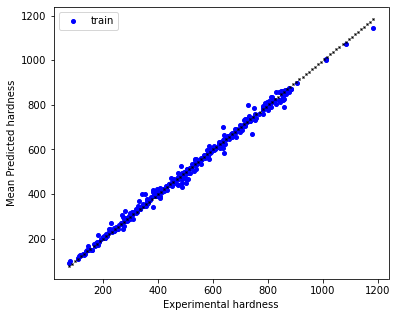

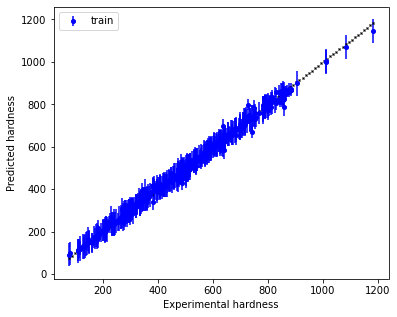

MFGP Predictions plots: Strength
************************************************
Strength MRel.AE train: 0.06403966514761268
Strength MRel.AE test: 0.333575212738746
Strength MAE train: 55.98673056651081
Strength MAE test: 323.6496317853329
************************************************


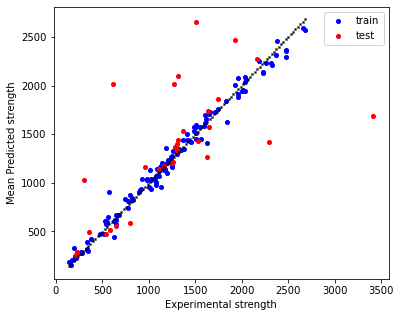

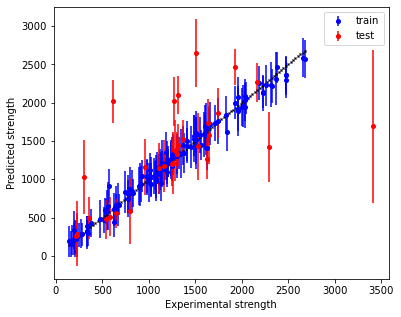

In [15]:
from sklearn.metrics import mean_absolute_error
def mean_relative_absolute_error(y_true, y_pred): 
    return np.mean( np.abs((y_pred-y_true)/y_true) )

print('MFGP Predictions plots: Hardness')
Hardness_MRelAE_train = mean_relative_absolute_error( z_g, mupred_g )
Hardness_MRelAE_test = mean_relative_absolute_error( z_test, mupred_g_test )

Hardness_MAE_train = mean_absolute_error( z_g,  mupred_g )
Hardness_MAE_test = mean_absolute_error( z_test,  mupred_g_test )

print ('************************************************')
print ('Hardness MRel.AE train: '+str(Hardness_MRelAE_train))
print ('Hardness MRel.AE test: '+str(Hardness_MRelAE_test))

print ('Hardness MAE train: '+str(Hardness_MAE_train))
print ('Hardness MAE test: '+str(Hardness_MAE_test))
print ('************************************************')

fit = np.linspace(min(z_g),max(z_g),100)

plt.figure(figsize=(6, 5))
plt.subplot(1, 1, 1)
plt.plot(z_g, mupred_g , 'o', color='blue', label='train', markersize=4)
plt.plot(z_test, mupred_g_test , 'o', color='blue', markersize=4)
plt.plot(fit, fit, 'x', label='', color='black',markersize=2)
plt.xlabel('Experimental hardness', fontsize=10)
plt.ylabel('Mean Predicted hardness', fontsize=10)
plt.legend(fontsize=10)

plt.figure(figsize=(6, 5))
plt.subplot(1, 1, 1)
plt.errorbar(z_g, mupred_g, yerr=errbarpred_g.flatten(), fmt='o', color='blue',markersize=4, label='train')
plt.errorbar(z_test, mupred_g_test, yerr=errbarpred_g_test.flatten(), fmt='o', color='blue',markersize=4)
plt.plot(fit, fit, 'x', label='', color='black', markersize=2)
plt.xlabel('Experimental hardness', fontsize=10)
plt.ylabel('Predicted hardness', fontsize=10)
plt.legend(fontsize=10)

plt.savefig(os.path.join(resultdir,str(seed)+'-'+'Hardness.pdf'),dpi=300)
plt.show()
plt.close()

print('MFGP Predictions plots: Strength')
Strength_MRelAE_train = mean_relative_absolute_error( y_f, mupred_f )
Strength_MRelAE_test = mean_relative_absolute_error( y_test, mupred_f_test )

Strength_MAE_train = mean_absolute_error( y_f,  mupred_f )
Strength_MAE_test = mean_absolute_error( y_test,  mupred_f_test )

print ('************************************************')
print ('Strength MRel.AE train: '+str(Strength_MRelAE_train))
print ('Strength MRel.AE test: '+str(Strength_MRelAE_test))

print ('Strength MAE train: '+str(Strength_MAE_train))
print ('Strength MAE test: '+str(Strength_MAE_test))
print ('************************************************')

fit = np.linspace(min(y_f),max(y_f),100)

plt.figure(figsize=(6, 5))
plt.subplot(1, 1, 1)
plt.plot(y_f, mupred_f , 'o', color='blue', label='train', markersize=4)
plt.plot(y_test, mupred_f_test , 'o', color='red', label='test', markersize=4)
plt.plot(fit, fit, 'x', label='', color='black',markersize=2)
plt.xlabel('Experimental strength', fontsize=10)
plt.ylabel('Mean Predicted strength', fontsize=10)
plt.legend(fontsize=10)

plt.figure(figsize=(6, 5))
plt.subplot(1, 1, 1)
plt.errorbar(y_f, mupred_f, yerr=errbarpred_f.flatten(), fmt='o', color='blue',markersize=4, label='train')
plt.errorbar(y_test, mupred_f_test, yerr=errbarpred_f_test.flatten(), fmt='o', color='red',markersize=4, label='test')
plt.plot(fit, fit, 'x', label='', color='black', markersize=2)
plt.xlabel('Experimental strength', fontsize=10)
plt.ylabel('Predicted strength', fontsize=10)
plt.legend(fontsize=10)

plt.savefig(os.path.join(resultdir,str(seed)+'-'+'Strength.pdf'),dpi=300)
plt.show()
plt.close()

## Diagnostic checks

In [16]:
postsamples_f = postsam_f[:,0,:].T
postsamples_f_test = postsam_f_test[:,0,:].T
postsamples_f.shape, postsamples_f_test.shape

((1000, 126), (1000, 32))

In [17]:
sigma_f = np.sqrt(mf.Gaussian_noise.variance.values[0])

(1000, 32)
(32, 1)


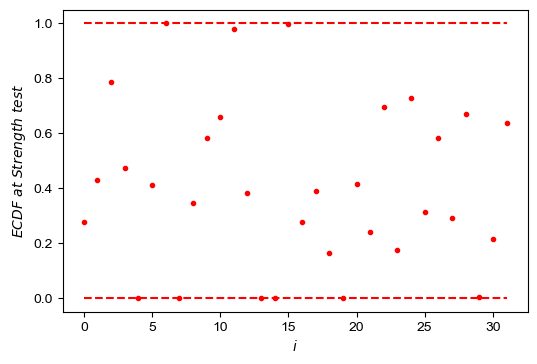

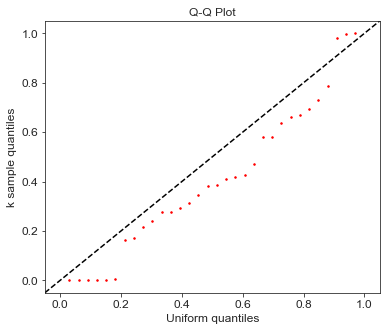

KstestResult(statistic=0.197, pvalue=0.14549115704433968)


Text(0.5, 0, '$k_i$')

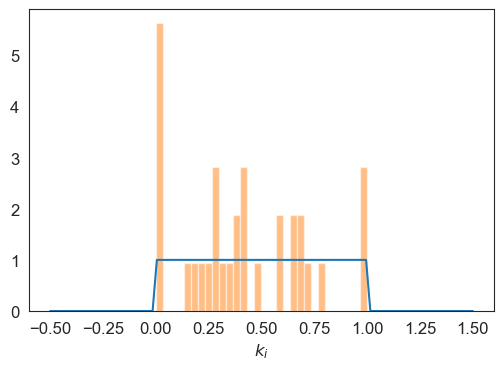

In [18]:
# predictive posterior (y*|y)
predpostsamples_f_test = np.zeros((postsamples_f_test.shape[0], postsamples_f_test.shape[1])) 
for i in range(predpostsamples_f_test.shape[0]):
    predpostsamples_f_test[i,:] = pm.Normal.dist(mu=postsamples_f_test[i,:], 
                                                sigma=sigma_f).random()
predpostsamples_f_test_un = scaler_y.inverse_transform(predpostsamples_f_test)
print (predpostsamples_f_test_un.shape)
print (y_test.shape)

# https://www.statsmodels.org/stable/generated/statsmodels.distributions.empirical_distribution.ECDF.html
from statsmodels.distributions.empirical_distribution import ECDF

ecdf_y_test = []
for i in range(y_test.shape[0]):
    ecdf = ECDF(predpostsamples_f_test_un[:,i]) # Build ECDF with all samples
    ecdf_y_test.append(ecdf(y_test[i])[0]) # CDF evaluated at test points
    
    
fig, ax = plt.subplots(dpi=100)
ax.plot(ecdf_y_test, 'o', color='red', markersize=3)
ax.plot(np.arange(y_test.shape[0]), 0.0 * np.ones(y_test.shape[0]), 'r--')
ax.plot(np.arange(y_test.shape[0]), 1.0 * np.ones(y_test.shape[0]), 'r--')
ax.set_xlabel('$i$')
ax.set_ylabel('$ECDF \ at \ Strength \ test$');


plt.rcParams.update({'font.size': 12})
import statsmodels.api as sm
import scipy.stats as st
import pylab
sns.set_style("white")
fig, ax = plt.subplots(figsize=(6,5))
fig_ = sm.qqplot(np.asarray(ecdf_y_test), st.uniform, loc=0, scale=1, marker='.', markerfacecolor='r', markeredgecolor='r', markersize=3, alpha=1, ax=ax)
sm.qqline(fig_.axes[0], line='45', fmt='k--')
ax.set_title('Q-Q Plot', fontsize=12)
ax.set_xlabel('Uniform quantiles', fontsize=12)
ax.set_ylabel('k sample quantiles', fontsize=12)
ax.tick_params(bottom=True, left=True)
fig.savefig(os.path.join(resultdir,str(seed)+'-'+'q-q_plot_Strength_test.pdf'),dpi=300)
plt.show()
plt.close()

# https://www.geeksforgeeks.org/ml-kolmogorov-smirnov-test/
res = st.kstest(ecdf_y_test,"uniform")    
print(res) 

ks = ecdf_y_test
fig, ax = plt.subplots(dpi=100)
ps = np.linspace(-0.5, 1.5, 100)
ax.plot(ps, st.uniform.pdf(ps))
ax.hist(ks, density=True, alpha=0.5, bins = 30)
ax.set_xlabel('$k_i$')

In [19]:
print ('Required outputs:')
print ('Seed used to split train and test data: '+str(seed_subset_selection)) 
print ('Strength MRel.AE test: '+str(Strength_MRelAE_test))
print ('Strength MAE test: '+str(Strength_MAE_test))
print ('Strength KS test: '+str(res.statistic))

Required outputs:
Seed used to split train and test data: 9
Strength MRel.AE test: 0.333575212738746
Strength MAE test: 323.6496317853329
Strength KS test: 0.197


In [20]:
y_test

array([[1302.  ],
       [1112.  ],
       [ 793.  ],
       [1160.  ],
       [1923.15],
       [ 220.  ],
       [2297.94],
       [1272.  ],
       [1280.  ],
       [1260.  ],
       [ 540.  ],
       [1625.  ],
       [ 225.  ],
       [1314.5 ],
       [ 618.8 ],
       [3416.  ],
       [2161.7 ],
       [1304.  ],
       [1370.  ],
       [1513.  ],
       [ 230.  ],
       [1317.  ],
       [ 586.  ],
       [ 964.  ],
       [ 650.  ],
       [1641.  ],
       [1250.  ],
       [1749.  ],
       [1525.  ],
       [ 300.  ],
       [ 357.  ],
       [1650.  ]])